In [1]:
import pandas as pd
import numpy as np

# 그래프 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 관련 라이브러리
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

# 1. ttest_1samp 함수를 이용한 평균키 검정

In [2]:
# A 대학교 평균키는 174라고 알려져 있다.
# 실제로 174인지, 더 큰지 확인을 해보고자 한다.
# 귀무가설 : A대학교 평균키는 174와 유의한 차이가 없다.
# 대립가설 : A대학교 평균키는 174보다 더 크다. (단측 검정)

In [3]:
df_h = pd.read_csv('data/heights.csv')

print(df_h.shape)
df_h.head(3)

(1078, 2)


,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747


In [4]:
# !pip install statsmodels

In [5]:
# 표본 평균키
df_h['son'].mean()

174.45753692820037

In [6]:
# 표본 표준편차
df_h['son'].std()

7.1493420461869

In [7]:
# 1 sample t-test
stats.ttest_1samp(df_h['son'], 174, alternative='greater')

TtestResult(statistic=2.1012099902448504, pvalue=0.017927222148374933, df=1077)

In [8]:
# 통계적 해석 : p-value < 0.05 이므로 대립가설 채택 
# 결론 : A대학교 평균키는 174보다 더 크다.(단측 검정) 

In [9]:
# if, 양측 검정을 했었다면,
# 귀무가설 : A대학교 평균키는 174와 유의한 차이가 없다.
# 대립가설 : A대학교 평균키는 174와 다르다.(유의한 차이가 있다)

In [10]:
stats.ttest_1samp(df_h['son'], 174, alternative='two-sided')

TtestResult(statistic=2.1012099902448504, pvalue=0.03585444429674987, df=1077)

In [11]:
# 해석 : p-value < 0.05 이므로 대립가설 채택.
# 결론 : A대학교 평균키는 174와 다르다.

# 2. 두 그룹 차이 검정

In [12]:
# Q. 남자 수학점수와 여자 수학점수 차이 검정

In [13]:
# 귀무가설 : 두 그룹은 차이가 없다. 
# 대립가설 : 두 그룹은 차이가 있다. (양측 검정) 
# 유의수준은 0.05 

In [14]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')

print(df_sp.shape)
df_sp.head(3)

(987, 8)


,sex,race,parental education,lunch,preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,some high school,free/reduced,none,18,32,28
2,female,group B,some college,standard,none,19,38,32


In [15]:
# 남녀 수학점수 평균
# df_sp.groupby('범주형변수')['수치형변수'].mean()
df_sp.groupby('sex')['math score'].mean()

sex
female    63.561886
male      68.393305
Name: math score, dtype: float64

In [16]:
# 남녀 수학점수 데이터 분리
male_math = df_sp[df_sp['sex'] == 'male']['math score']
female_math = df_sp[df_sp['sex'] == 'female']['math score']

In [17]:
male_math   # 시리즈 형태의 데이터

16      27
17      28
18      33
20      34
23      35
      ... 
980     99
983    100
984    100
985    100
986    100
Name: math score, Length: 478, dtype: int64

### 2-1. 정규성 불만족 시 => 비모수 검정

In [18]:
# shapiro 정규성 검정(귀무가설 : 데이터의 분포가 정규분포와 같다)
stats.shapiro(male_math), stats.shapiro(female_math)

(ShapiroResult(statistic=0.9948297721426106, pvalue=0.10925772997767996),
 ShapiroResult(statistic=0.9923991147460336, pvalue=0.01080427293266735))

In [19]:
# 남자 수학점수는 p-value > 0.05 이므로 귀무가설 채택. -> 정규성 만족 
# 여자 수학점수는 p-valeu < 0.05 이므로 대립가설 채택. -> 정규성 불만족(정규분포를 따르지 않는다)
# 정규성 검정 결과, 정규성 불만족.

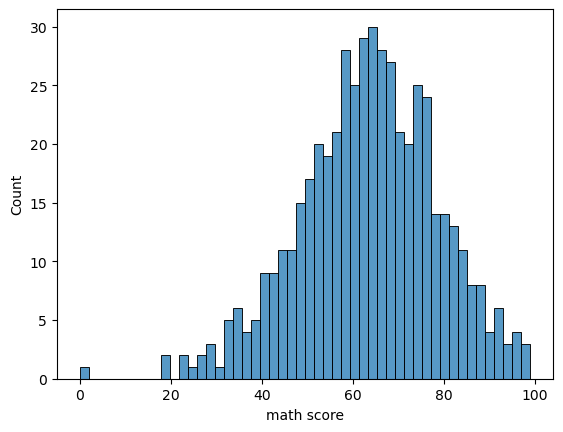

In [20]:
sns.histplot(x=female_math, binwidth=2);

In [21]:
# (비모수 검정) 윌콕슨 순위합 검정(=맨 휘트니 검정)  -> 정규분포를 따르지 않는 데이터에 수행하는 t-test 대체 검정 
stats.ranksums(male_math, female_math, alternative='two-sided')

RanksumsResult(statistic=4.842485861382294, pvalue=1.2822476216088928e-06)

In [22]:
# 해석 : p-value < 0.000001 이므로 대립가설 채택.
# 결론 : 두 그룹은 유의한 중앙값 차이가 있다.

In [23]:
# 윌콕슨 순위합 검정을 사용하는 상황
# 정규성 가정이 깨짐
# 이상치 데이터 많음
# 표본 수가 적을 때 (ex. 10개 미만)

In [24]:
# 그렇다면 만약, 정규성 만족인 경우에는 어떻게 차이 검정이 진행될까요?

### 2-2. 정규성 만족 시 => 모수 검정 

In [25]:
# 데이터 전처리를 해서 정규성 만족 후 t-test를 수행해보자.

In [26]:
# 이상치가 제거된 여성 수학점수
female_math2 = female_math[female_math >= 24]
female_math2 

5      24
6      26
7      27
8      29
9      29
       ..
975    97
976    97
979    98
981    99
982    99
Name: math score, Length: 504, dtype: int64

In [27]:
# 다시 정규성 검정
stats.shapiro(female_math2)

ShapiroResult(statistic=0.9958904574988353, pvalue=0.21301966474028178)

In [28]:
# 이상치가 제거된 여성 수학점수는 정규성 만족.

In [29]:
import scipy
scipy.__version__

'1.13.1'

In [30]:
# 등분산 검정(귀무가설 : 두 그룹이 분산이 같다)
stats.bartlett(male_math, female_math2)

BartlettResult(statistic=0.945889818039316, pvalue=0.3307677200636241)

In [31]:
# p-value > 0.05 이므로 귀무가설 채택 -> 등분산 만족 

In [32]:
# 독립 표본 t-test 
stats.ttest_ind(male_math, female_math2, alternative='two-sided', equal_var=True)

TtestResult(statistic=4.75146572963073, pvalue=2.3212333827714955e-06, df=980.0)

In [33]:
# 해석 : p-value < 0.00001 이므로 대립가설 채택
# 결론 : 남자 수학점수와 여자 수학점수는 유의한 평균 차이가 있다.

In [34]:
# if, 분산이 다르다면 -> welch t-test
stats.ttest_ind(male_math, female_math2, alternative='two-sided', equal_var=False)

TtestResult(statistic=4.7570061243342465, pvalue=2.2598756850962233e-06, df=979.9202720718512)

In [35]:
# 해석 : p-value < 0.00001 이므로 대립가설 채택
# 결론 : 남자 수학점수와 여자 수학점수는 유의한 평균 차이가 있다.

In [36]:
# [실습] 단측 검정 - 남자 수학점수가 더 크다(greater)
stats.ttest_ind(male_math, female_math2, alternative='greater')

TtestResult(statistic=4.75146572963073, pvalue=1.1606166913857477e-06, df=980.0)

In [37]:
# 해석 : p-value 가 거의 0에 가까우므로 대립가설 채택
# 결론 : 남자 수학점수가 여자 수학점수보다 유의하게 평균이 더 크다.

### [실습] 두 그룹 차이 검정

In [38]:
# 1. 남녀 각각 평균 reading score 계산 (groupby)
# 2. 남자 reading score와 여자 reading score 데이터 분리 후 변수로 저장
# 3. shapiro 정규성 검정 후 결과에 따라 두 그룹 차이 검정 수행
# 귀무가설 : 차이가 없다.
# 대립가설 : 남성 점수가 여성 점수보다 작다(less).
# 4. 남녀 독해점수 Welch's t-test 수행

In [39]:
# 1. 남녀 각각 평균 reading score 계산 (groupby)
df_sp.groupby('sex')['reading score'].mean()

sex
female    72.426326
male      65.069038
Name: reading score, dtype: float64

In [40]:
# 2. 남자 reading score와 여자 reading score 데이터 분리 후 변수로 저장
male_reading = df_sp[df_sp['sex']== 'male']['reading score']
female_reading = df_sp[df_sp['sex']== 'female']['reading score']

In [41]:
# 3. shapiro 정규성 검정 후 결과에 따라 두 그룹 차이 검정 수행
# 귀무가설 : 차이가 없다.
# 대립가설 : 남성 독해점수가 여성 독해점수보다 작다(less).

In [42]:
# 정규성 검정 
stats.shapiro(male_reading), stats.shapiro(female_reading)

(ShapiroResult(statistic=0.9937645141993083, pvalue=0.04648775879252898),
 ShapiroResult(statistic=0.9814912759744497, pvalue=4.534418957286062e-06))

In [43]:
# 남녀 모두 정규성 불만족

In [44]:
# (비모수 검정) 윌콕슨 순위합 검정
stats.ranksums(male_reading, female_reading, alternative='less')

RanksumsResult(statistic=-8.011601115395095, pvalue=5.661229357049829e-16)

In [45]:
# 해석 : p-value가 거의 0에 가까우므로 대립가설 채택
# 결론 : 남성 독해점수는 여성 독해점수보다 유의하게 중앙값이 더 작다.

In [46]:
# 4. 남녀 독해점수 Welch's t-test 수행
stats.ttest_ind(male_reading, female_reading, alternative='less', equal_var=False)

TtestResult(statistic=-8.08102018025995, pvalue=9.353435665130404e-16, df=984.609308886994)

In [47]:
# 해석 : p-value가 거의 0에 가까우므로 대립가설 채택
# 결론 : 남성 독해점수는 여성 독해점수보다 유의하게 평균이 더 작다.

# 3. 분산분석(anova) : 세 그룹 이상 차이 검정

In [64]:
df_ins['ins_type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [48]:
# Q. 보험료 데이터에서 ins_type 간 가입기간(period)는 차이가 있을까? 
# 귀무가설 : 그룹 간 차이가 없다.
# 대립가설 : 적어도 두 그룹은 period 차이가 있다.

In [65]:
df_ins = pd.read_csv('data/insurance.csv')
df_ins.shape

(1353, 9)

In [66]:
# 보험타입(ins_type) 별 보험기간(period) 평균은? (groupby)
df_ins.groupby('ins_type')['period'].mean()

ins_type
A    5.205543
B    4.986253
C    5.083592
Name: period, dtype: float64

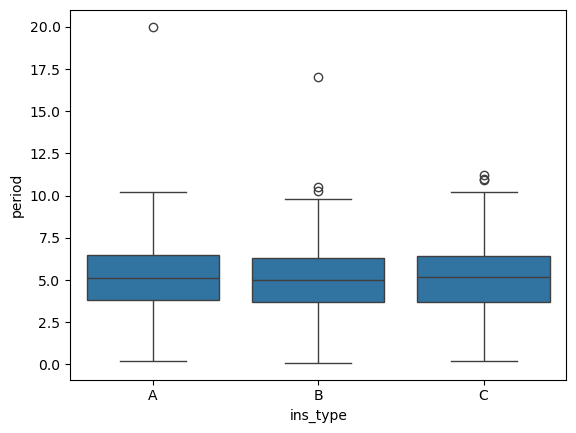

In [67]:
# 상자그림
sns.boxplot(df_ins, y='period', x='ins_type');

### 3-1. stats.f_oneway 활용한 분산분석

In [ ]:
# 데이터를 그룹별로 분할 후 f_oneway() 함수 활용
g1 = df_ins[df_ins['ins_type'] == 'A']['period']
g2 = df_ins[df_ins['ins_type'] == 'B']['period']
g3 = df_ins[df_ins['ins_type'] == 'C']['period']

In [72]:
# 정규성 검정(귀무가설 : 데이터가 정규분포를 따른다) 
stats.shapiro(g1), stats.shapiro(g2), stats.shapiro(g3)

(ShapiroResult(statistic=0.9609627280677312, pvalue=1.4330273745547826e-09),
 ShapiroResult(statistic=0.979152137466476, pvalue=4.53409450856129e-06),
 ShapiroResult(statistic=0.993884463720728, pvalue=0.06630241192528225))

In [74]:
# 정규성 불만족이므로 비모수 검정 수행
# kruskal(anova를 대체하는 비모수 검정)
stats.kruskal(g1, g2, g3)

KruskalResult(statistic=2.1702378162710483, pvalue=0.3378616090120884)

In [ ]:
# 해석 : p-value > 0.05 이므로 귀무가설 채택
# 결론 : 그룹 간 중앙값 차이가 없다.

In [75]:
# if, 정규성 만족이었다면, 

# 등분산 검정(귀무가설 : 그룹 간 분산이 같다) 
stats.bartlett(g1, g2, g3)

BartlettResult(statistic=2.3844658034005226, pvalue=0.3035427257255459)

In [76]:
# 등분산 만족

In [77]:
# 분산분석(anova) : 여러 그룹 간 평균 차이 검정 
stats.f_oneway(g1, g2, g3) 

F_onewayResult(statistic=1.3640782415863413, pvalue=0.25596826874927986)

In [ ]:
# 해석 : p-value > 0.05 이므로 귀무가설 채택
# 결론 : 그룹 간 평균 차이가 없다. 

### 3-2. anova_lm 활용한 분산분석

In [53]:
# 정규성, 등분산 만족 가정
# 데이터 분리 필요 없는 방법

In [78]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [55]:
# Q. 보험타입 간 가입기간(period)는 차이가 있을까?

In [56]:
# data = ols("수치형변수 ~ C(범주형변수)", df).fit()
# anova_lm(data)

In [79]:
# 분산분석 (간단 버전)
data = ols("period ~ C(ins_type)", df_ins).fit()
anova_lm(data)

,df,sum_sq,mean_sq,F,PR(>F)
C(ins_type),2.0,10.889446,5.444723,1.364078,0.255968
Residual,1350.0,5388.529490,3.991503,NaN,NaN


In [ ]:
# 해석 : p-value > 0.05 이므로 귀무가설 채택 
# 결론 : 그룹 간 평균 차이가 없다. 

In [57]:
# Q : 분산분석 시 ols에서 띄어쓰기가 있는 변수를 묶어주는 방법
# data = ols("Q('math score') ~ C(race)", df_sp).fit()

In [82]:
# 데이터 df_sp 에서 race별 math score의 차이가 있을까?
# 분산분석 수행(정규성, 등분산 가정)

data = ols("Q('math score') ~ C(race)", df_sp).fit()
anova_lm(data)

,df,sum_sq,mean_sq,F,PR(>F)
C(race),4.0,11672.313877,2918.078469,13.748067,6.500327e-11
Residual,982.0,208433.153195,212.253720,NaN,NaN


In [83]:
# 해석 : p-value가 0에 가까우므로  대립가설 채택
# 결론 : 적어도 두 race 간에는 유의한 math score 평균 차이가 있다.

In [59]:
# [실습] 띄어쓰기가 있는 변수들의 분산분석
# 1. 데이터 df_sp에서 parental education 별 reading score의 평균 계산하기
# 2. 1번의 두 변수를 활용해서 anova_lm 함수로 분산분석 수행하기(정규성, 등분산 가정)

In [84]:
# 1. 데이터 df_sp에서 parental education 별 reading score의 평균 계산하기
df_sp.groupby('parental education')['reading score'].mean()

parental education
associate's degree    70.655814
bachelor's degree     72.614035
high school           64.422680
master's degree       75.372881
some college          69.216814
some high school      66.541899
Name: reading score, dtype: float64

In [86]:
# 2. 1번의 두 변수를 활용해서 anova_lm 함수로 분산분석 수행하기(정규성, 등분산 가정)

data = ols("Q('reading score') ~ Q('parental education')", df_sp).fit()
anova_lm(data)

,df,sum_sq,mean_sq,F,PR(>F)
Q('parental education'),5.0,9613.038501,1922.607700,9.176232,1.514141e-08
Residual,981.0,205539.496453,209.520384,NaN,NaN


In [ ]:
# 해석 : p-value가 0에 가까우므로, 대립가설 채택.
# 결론 : 적어도 두 parental education 그룹 간에는 유의한 reading score 평균 차이가 있다.

# 4. 독립성 검정(카이제곱 검정)

In [60]:
# 두 범주형 변수 간 독립(연관성) 여부 확인

In [61]:
# Q. 성별(남, 녀)과 흡연여부(YES, NO)는 서로 독립인가(연관성이 있는가)

In [ ]:
# 귀무가설 : 두 범주형 변수는 독립이다.
# 대립가설 : 두 범주형 변수는 독립이 아니다.

In [87]:
# 교차표
ct = pd.crosstab(df_ins['sex'], df_ins['smoker'])
ct

smoker,no,yes
sex,,
female,549,117
male,518,169


In [88]:
# 독립성 검정
stats.chi2_contingency(ct)

Chi2ContingencyResult(statistic=9.61426576423706, pvalue=0.0019307163989584425, dof=1, expected_freq=array([[525.2195122, 140.7804878],
       [541.7804878, 145.2195122]]))

In [ ]:
# statistic(카이제곱값)
# p-value
# dof(자유도) : (2-1)x(2-1) = 1
# expected_freq(독립을 가정한 교차표)

In [ ]:
# 해석 : p-value < 0.05 이므로 대립가설 채택.
# 결론 : 성별과 흡연 여부는 독립이 아니다.(연관성이 있다.)

In [ ]:
# 성별이 달라질 때 흡연 여부가 달라질 가능성이 크다. 

In [89]:
# (강의자료 독립성 검정 예시) 연령대에 따른 상품 선호도
import pandas as pd

# 교차표 생성
data = {
    '20대': [30, 20, 0],
    '30대': [0, 20, 30]
}

index = ['A', 'B', 'C']
age_product = pd.DataFrame(data, index=index)
age_product

,20대,30대
A,30,0
B,20,20
C,0,30


In [90]:
stats.chi2_contingency(age_product)

Chi2ContingencyResult(statistic=60.0, pvalue=9.357622968840163e-14, dof=2, expected_freq=array([[15., 15.],
       [20., 20.],
       [15., 15.]]))

### [실습] 독립성 검정

In [63]:
# Q. race 와 parental education은 서로 독립인가?
# 1. df_sp 데이터의 race 와 parental education 교차표 만들고 ct 변수에 저장
# 2. 독립성 검정